# EJERCICIO

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, 1:2]])

target = raw_df.values[1::2, 2]
frame = pd.DataFrame(data)

In [2]:
# Muestra las variables predictoras
frame

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = frame
y = target

In [4]:
# Separación del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
# Definición y ajuste del modelo de regresión lineal
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [6]:
# Coeficientes lineales (pesos)
modelo.coef_

array([-1.29806349e-01,  4.91324828e-02,  4.01810373e-02,  2.49924995e+00,
       -1.83611894e+01,  3.46829661e+00,  1.11801499e-02, -1.39355872e+00,
        2.96290706e-01, -1.32695552e-02, -9.88299982e-01, -5.67182050e-01])

In [7]:
# Intercepto del modelo lineal
modelo.intercept_

42.72186724415589

# Métricas

In [8]:
# Se obtiene la predicción del conjunto de prueba
y_pred = modelo.predict(X_test)

## RMSE

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
# RMSE contra la etiqueta real y_test
mean_squared_error(y_test,y_pred,squared=False)

4.490349736693195

<Axes: >

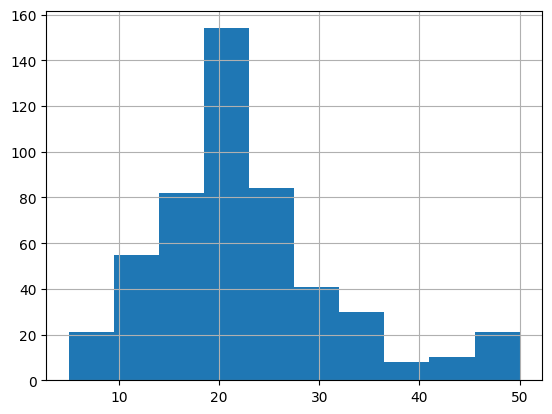

In [15]:
pd.Series(target).hist()

El error $RMSE \approx 4.5$ es considerado alto en el contexto de los resultados del problema, al ser casi el 10% del rango de valores resultantes. Aunque es menor a la desviación estándar.

## $R^2$

In [11]:
from sklearn.metrics import r2_score

In [12]:
# R2 contra la etiqueta real y_test
r2_score(y_test,y_pred)

0.7808334786469185

El modelo explica el 78.08% de la variabilidad en los datos. Lo cual no es satisfactoriamente alto, quizás se podría aumentar usando un subconjunto más pequeño de variables predictorias que estén altamente correlacionadas.